# Crime Data Analysis and Preprocessing

This notebook explores and preprocesses crime data for linear regression modeling.

## 1. Import Libraries and Load Data
Import pandas, matplotlib, seaborn, and scikit-learn preprocessing modules. Load the crime dataset using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv('crime_data_balanced.csv')

In [2]:
# Calculate mean and std for Offender_Age and Victim_Age BEFORE standardization for flutter app ui
print('Offender Age Mean:', df['Offender_Age'].mean())
print('Offender Age Std:', df['Offender_Age'].std())
print('Victim Age Mean:', df['Victim_Age'].mean())
print('Victim Age Std:', df['Victim_Age'].std())

Offender Age Mean: 32.68695744230362
Offender Age Std: 11.635924607314797
Victim Age Mean: 37.23830192674148
Victim Age Std: 15.66995683147725


## 2. Initial Data Exploration
Display the first few rows, info, and descriptive statistics of the dataset.

In [3]:
# Display first few rows
print(df.head())
# Display info
print(df.info())
# Display descriptive statistics
print(df.describe())

  Disposition OffenderStatus Offender_Race Offender_Gender  Offender_Age  \
0      CLOSED       ARRESTED         BLACK            MALE          15.0   
1      CLOSED       ARRESTED         BLACK          FEMALE          35.0   
2      CLOSED       ARRESTED         BLACK            MALE          50.0   
3      CLOSED       ARRESTED         BLACK            MALE          39.0   
4      CLOSED       ARRESTED         BLACK            MALE          16.0   

  PersonType Victim_Race Victim_Gender  Victim_Age Victim_Fatal_Status  \
0     VICTIM     UNKNOWN        FEMALE        43.0           Non-fatal   
1     VICTIM       WHITE          MALE        51.0           Non-fatal   
2     VICTIM       WHITE          MALE        34.0           Non-fatal   
3     VICTIM       BLACK          MALE        26.0           Non-fatal   
4     VICTIM       WHITE        FEMALE        23.0           Non-fatal   

           Report Type   Category  
0  Supplemental Report      Theft  
1      Incident Report    

## 3. Data Visualization
Create count plots and histograms for key columns such as Victim_Fatal_Status, Offender_Age, Victim_Age, and Category using seaborn and matplotlib.

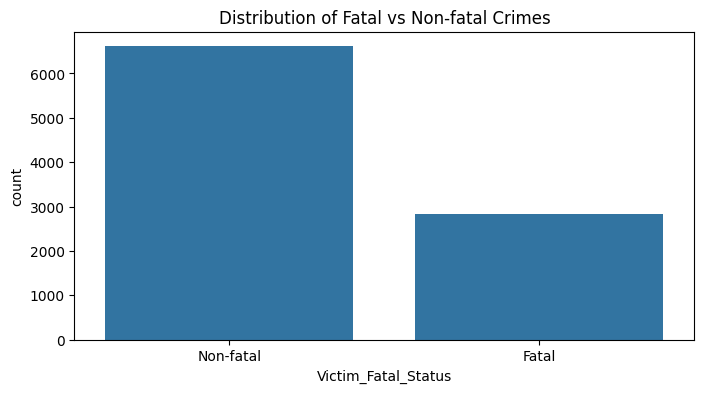

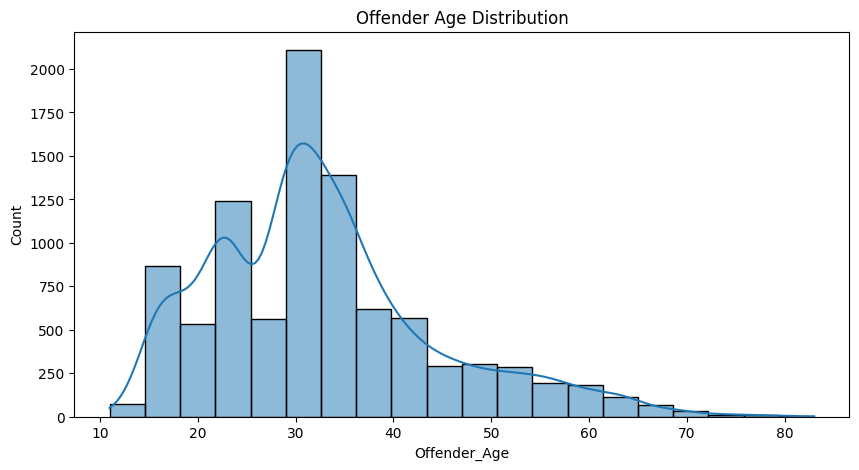

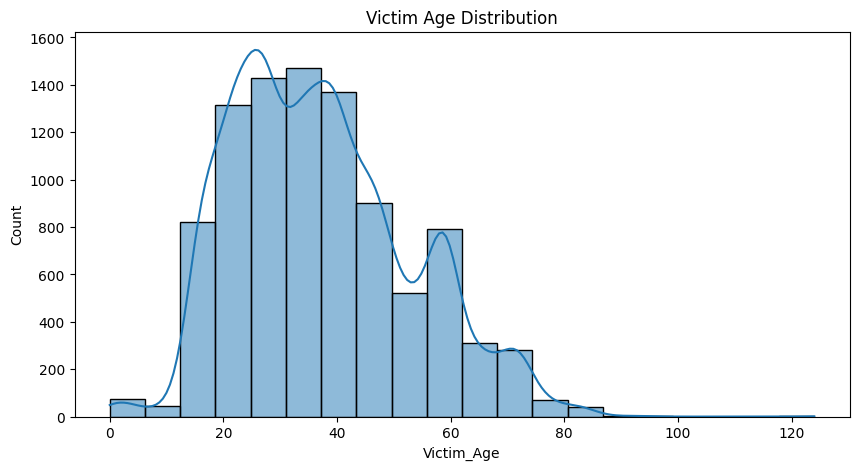

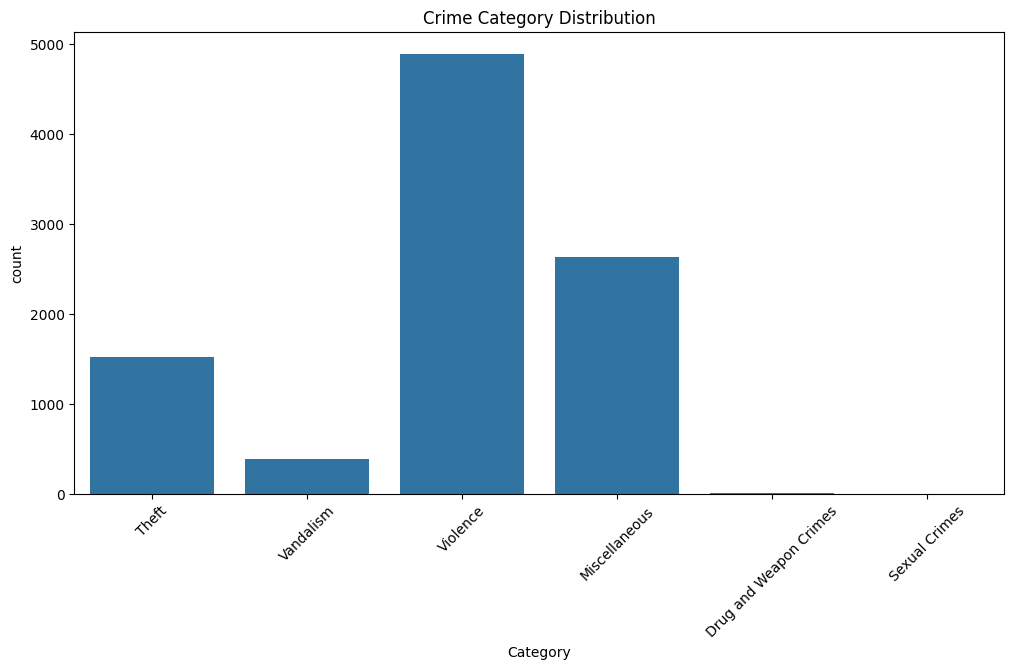

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x='Victim_Fatal_Status', data=df)
plt.title('Distribution of Fatal vs Non-fatal Crimes')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Offender_Age'], bins=20, kde=True)
plt.title('Offender Age Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Victim_Age'], bins=20, kde=True)
plt.title('Victim Age Distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df)
plt.title('Crime Category Distribution')
plt.xticks(rotation=45)
plt.show()

## 4. Feature Engineering
Drop unnecessary columns such as Disposition, PersonType, and Report Type.

In [5]:
cols_to_drop = ['Disposition', 'PersonType', 'Report Type']
df = df.drop(columns=cols_to_drop)

## 5. Encode Categorical Variables
Use LabelEncoder to encode categorical columns like OffenderStatus, Offender_Race, Offender_Gender, Victim_Race, Victim_Gender, and Category.

In [6]:
cat_cols = ['OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Victim_Race', 'Victim_Gender', 'Category']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

## 6. Encode Target Variable
Map Victim_Fatal_Status to binary values: Non-fatal as 0 and Fatal as 1.

In [7]:
df['Victim_Fatal_Status'] = df['Victim_Fatal_Status'].map({'Non-fatal': 0, 'Fatal': 1})

## 7. Standardize Numeric Columns
Apply StandardScaler to numeric columns Offender_Age and Victim_Age.

In [8]:
scaler = StandardScaler()
numeric_cols = ['Offender_Age', 'Victim_Age']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## 8. Save Processed Data
Save the processed DataFrame to a CSV file for modeling.

In [9]:
df.to_csv('crime_data_processed.csv', index=False)
print('Data preprocessing complete. Processed file saved as crime_data_processed.csv.')

Data preprocessing complete. Processed file saved as crime_data_processed.csv.
